### Множественная линейная регрессия на чистых данных

#### Цель работы

Познакомиться с основными приемами работы с множественными регрессионными моделями с использованием библиотеки sklearn. 

#### Содержание работы

1. Ваша задача - построить предиктивную модель предсказания целевой переменной в зависимости от значения нескольких факторов (признаков).
2. Загрузите датасет из приложения. Вам понадобится два файла - отдельно с признаками (помечен x) и значениями целевой переменной (помечен y). Файлы не содержат заголовков столбцов и строк. Выведите первые строки датасета.
3. Сделайте количественное описание датасета: количество точек данных, признаков, статистику по каждому признаку.
4. Для целевой и каждого из признаков постройте парную регрессионную модель. Визуализируйте линию регрессии и исходные данные на графике. При помощи коэффициентов оцените силу связи.
5. Постройте модель множественной линейной регрессии целевой переменной от всех показателей. Оцените качество регрессии, сделайте вывод.

#### 2. Загрузите датасет из приложения. Вам понадобится два файла - отдельно с признаками (помечен x) и значениями целевой переменной (помечен y). Файлы не содержат заголовков столбцов и строк. Выведите первые строки датасета.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

x = pd.read_csv("https://github.com/koroteevmv/ML_course/raw/main/ML1.2%20multivariate/data/0_x.csv",
                header=None)
y = pd.read_csv("https://github.com/koroteevmv/ML_course/raw/main/ML1.2%20multivariate/data/0_y.csv",
                header=None)

x.head()

,0,1,2,3,4
0,0.071841,0.855352,-0.305597,0.028253,1.826895
1,0.139521,-0.423507,0.461059,-0.447400,-0.034988
2,1.626311,-0.257622,-0.697520,1.413219,1.086292
3,-1.183233,-0.826343,0.073047,-0.639690,-0.503273
4,-0.783365,-0.861232,0.951448,-0.117306,0.680597


#### 3. Сделайте количественное описание датасета: количество точек данных, признаков, статистику по каждому признаку.

In [4]:
x.shape, y.shape

((387, 5), (387, 1))

In [14]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387 entries, 0 to 386
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       387 non-null    float64
 1   1       387 non-null    float64
 2   2       387 non-null    float64
 3   3       387 non-null    float64
 4   4       387 non-null    float64
dtypes: float64(5)
memory usage: 15.2 KB


In [15]:
x.describe()

,0,1,2,3,4
count,387.000000,387.000000,387.000000,387.000000,387.000000
mean,0.080231,-0.023369,-0.094194,0.052474,0.067604
std,1.006557,1.008319,1.013547,0.996496,0.964922
min,-2.721942,-3.526587,-2.952847,-3.468134,-2.376103
25%,-0.505726,-0.606748,-0.731435,-0.594637,-0.582224
50%,0.064065,-0.006496,-0.123261,0.022809,-0.027389
75%,0.746176,0.602911,0.534841,0.750923,0.665682
max,3.077357,2.779463,2.959742,2.943178,3.626974


#### 4. Для целевой и каждого из признаков постройте парную регрессионную модель. Визуализируйте линию регрессии и исходные данные на графике. При помощи коэффициентов оцените силу связи.

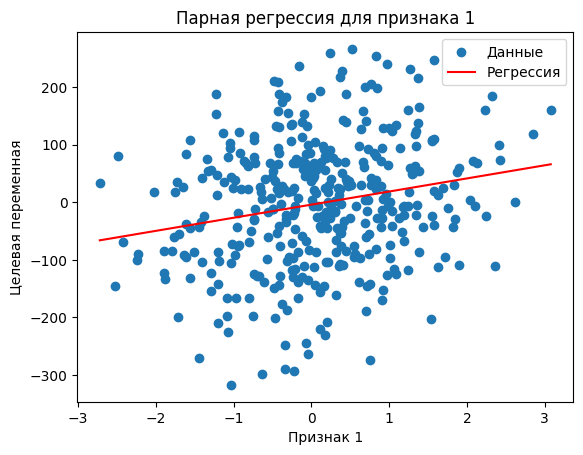

Коэффициент детерминации (R^2) для признака 1: 0.04364336234689348


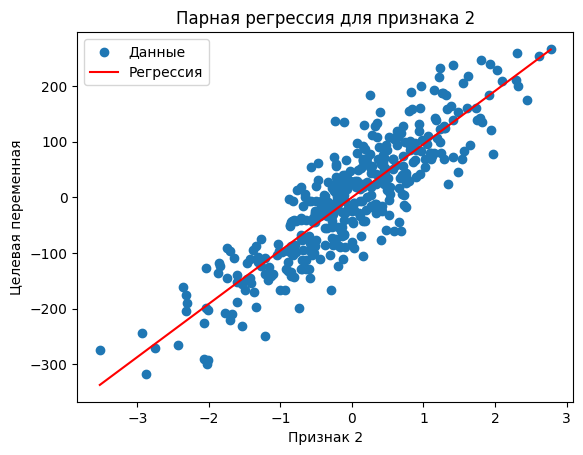

Коэффициент детерминации (R^2) для признака 2: 0.7699743283650629


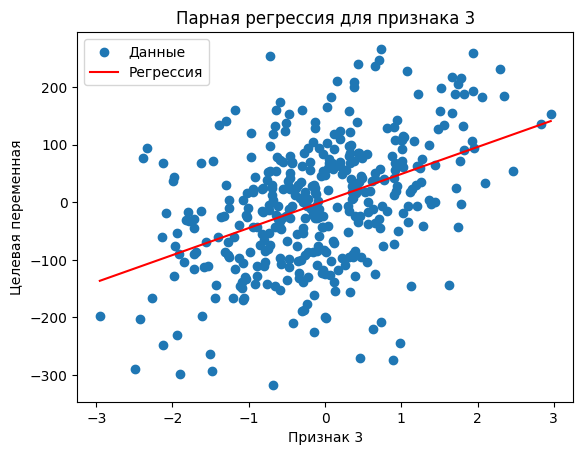

Коэффициент детерминации (R^2) для признака 3: 0.18794528514998887


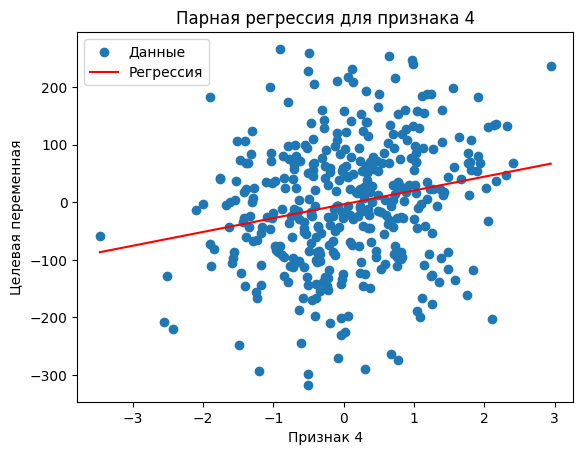

Коэффициент детерминации (R^2) для признака 4: 0.047470345664983093


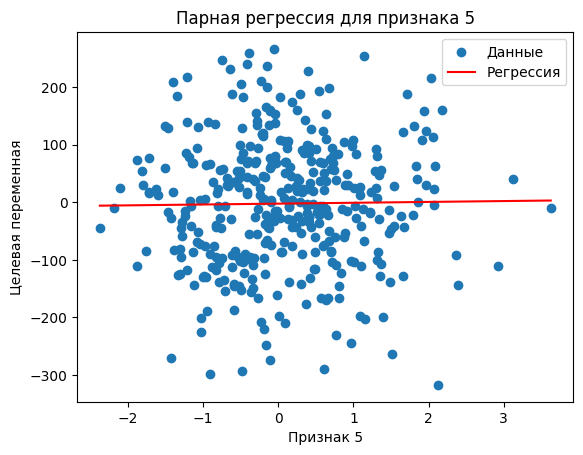

Коэффициент детерминации (R^2) для признака 5: 0.00017176151145947838


In [8]:
from sklearn.linear_model import LinearRegression

for i in range(x.shape[1]):
    model = LinearRegression()
    model.fit(x[[i]], y)

    plt.scatter(x[i], y,  label='Данные')
    xx = np.linspace(x[i].min(), x[i].max(), 100).reshape((-1, 1))
    plt.plot(xx, model.predict(xx), color='red', label='Регрессия')
    plt.title(f'Парная регрессия для признака {i+1}')
    plt.xlabel(f'Признак {i+1}')
    plt.ylabel('Целевая переменная')
    plt.legend()
    plt.show()

    print(f"Коэффициент детерминации (R^2) для признака {i+1}: {model.score(x[[i]], y)}")

#### 5. Постройте модель множественной линейной регрессии целевой переменной от всех показателей. Оцените качество регрессии, сделайте вывод.

In [16]:
lr = LinearRegression()

lr.fit(x, y)
lr.score(x, y)

0.9922198026415868

#### Задания для самостоятельного выполнения
1. Самостоятельно постройте парные регрессии от каждого атрибута с целевой переменной. (cделано выше)
2. (\*) Модифицируйте код из предыдущей работы так, чтобы модель регрессии умела работать с входными данными, состоящими из произвольного количества столбцов.
3. Для целевой переменной и каждого из признаков постройте полиномиальную регрессию второго, третьего и десятого порядков. Сделайте вывод о значимости регрессии.
4. Постройте сводную таблицу показателей точности всех построенных моделей. Сделайте вывод, какие модели переобученнные, какие - недообученные.
5. Используйте другие метрики качества регрессионной модели в дополнение к коэффициенту детерминации.
6. (\*) Замерьте время обучения полиномиальных моделей с разной степенью полинома. Сделайте вывод.

#### 3. Для целевой переменной и каждого из признаков постройте полиномиальную регрессию второго, третьего и десятого порядков. Сделайте вывод о значимости регрессии.

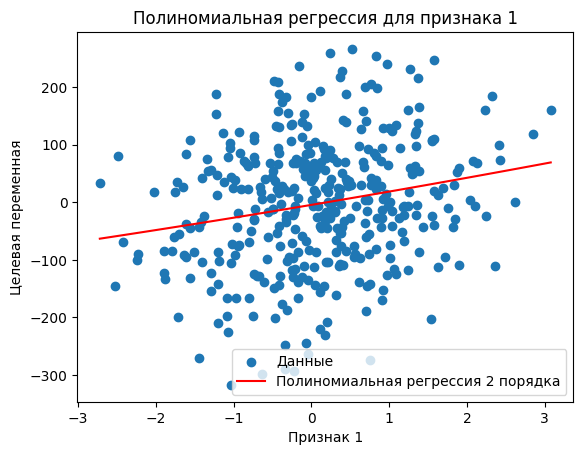

Коэффициент детерминации (R^2) для признака 1 и полиномиальной регрессии 2 порядка: 0.04367170367915507


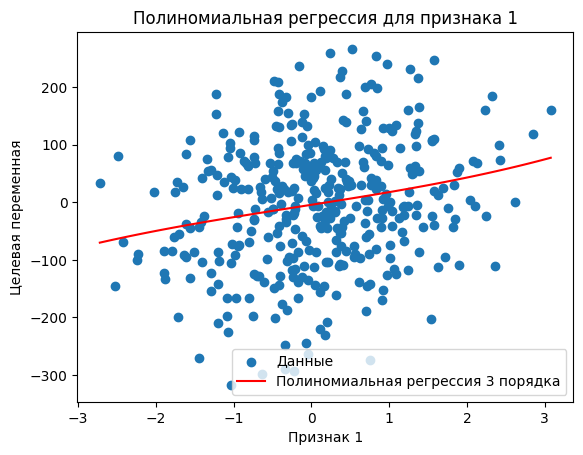

Коэффициент детерминации (R^2) для признака 1 и полиномиальной регрессии 3 порядка: 0.04376506816920167


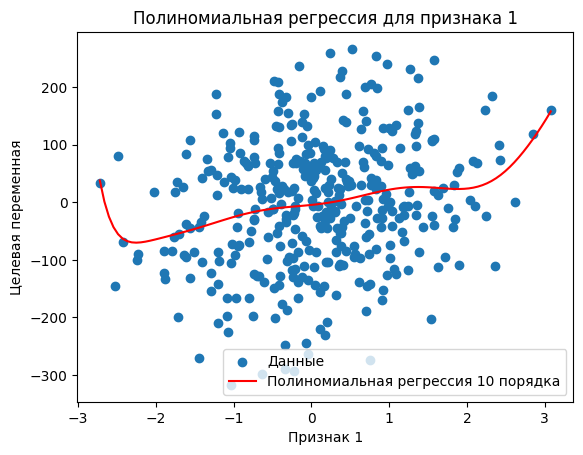

Коэффициент детерминации (R^2) для признака 1 и полиномиальной регрессии 10 порядка: 0.05035596325168745


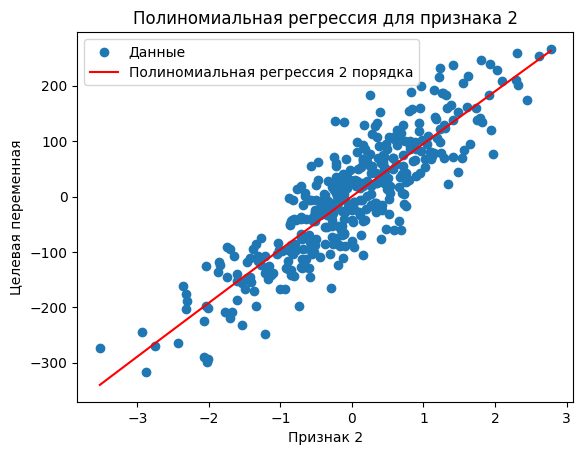

Коэффициент детерминации (R^2) для признака 2 и полиномиальной регрессии 2 порядка: 0.7699942588883133


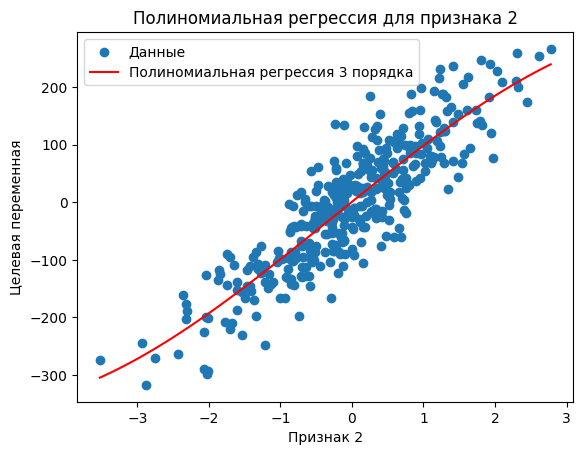

Коэффициент детерминации (R^2) для признака 2 и полиномиальной регрессии 3 порядка: 0.7711184109235


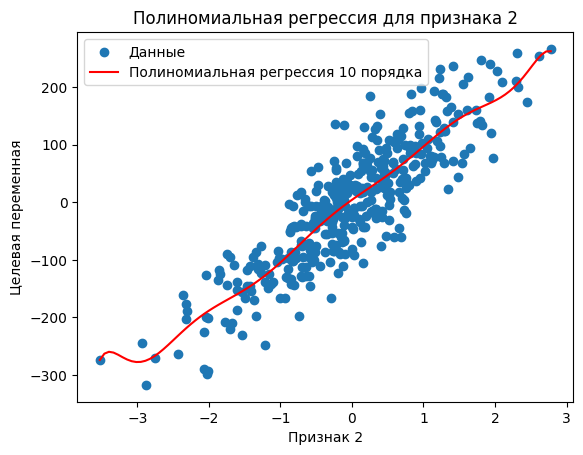

Коэффициент детерминации (R^2) для признака 2 и полиномиальной регрессии 10 порядка: 0.7726769307411923


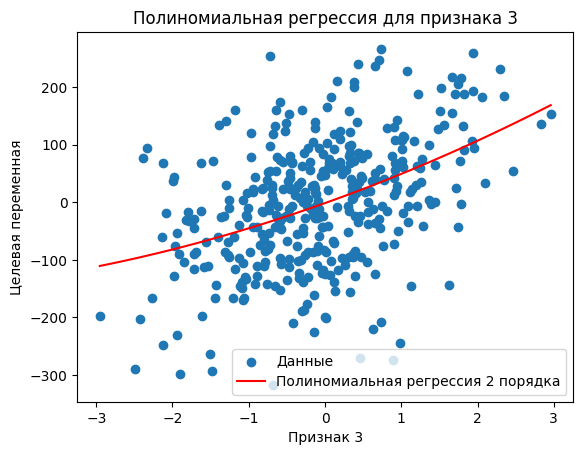

Коэффициент детерминации (R^2) для признака 3 и полиномиальной регрессии 2 порядка: 0.19000787278473807


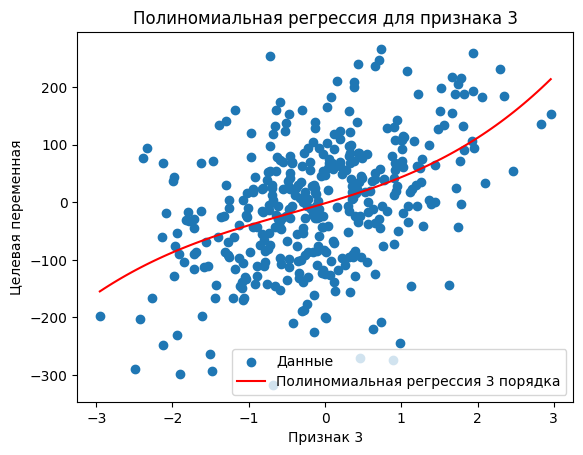

Коэффициент детерминации (R^2) для признака 3 и полиномиальной регрессии 3 порядка: 0.19280163734543843


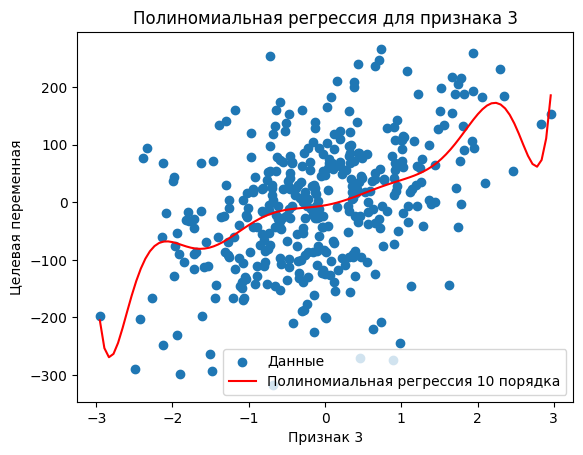

Коэффициент детерминации (R^2) для признака 3 и полиномиальной регрессии 10 порядка: 0.20440944561264418


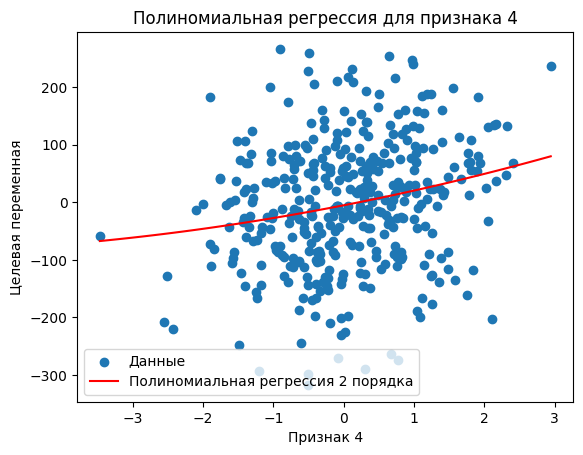

Коэффициент детерминации (R^2) для признака 4 и полиномиальной регрессии 2 порядка: 0.04794250960519941


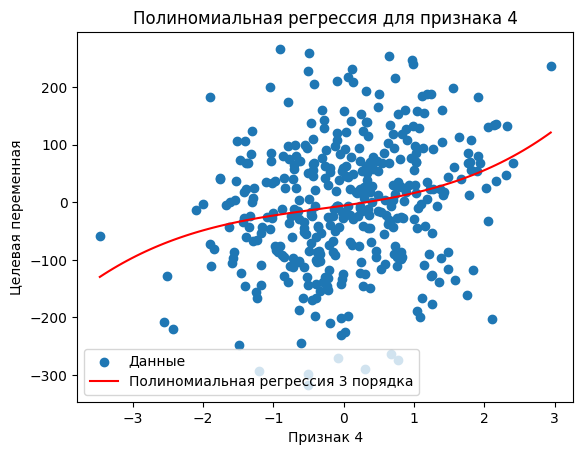

Коэффициент детерминации (R^2) для признака 4 и полиномиальной регрессии 3 порядка: 0.05031163217811918


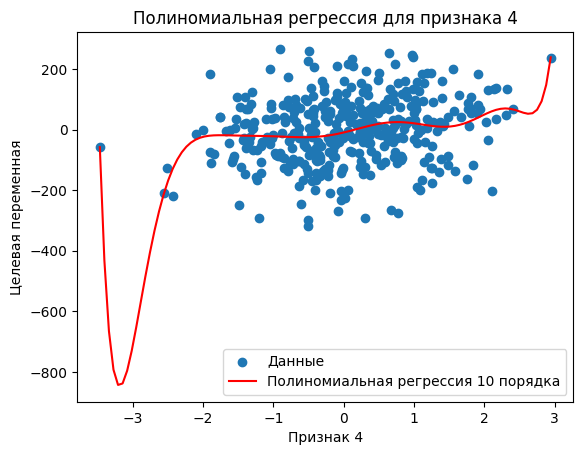

Коэффициент детерминации (R^2) для признака 4 и полиномиальной регрессии 10 порядка: 0.07266746559268988


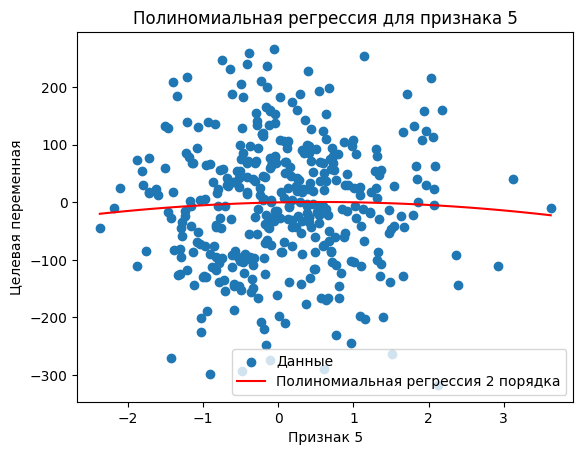

Коэффициент детерминации (R^2) для признака 5 и полиномиальной регрессии 2 порядка: 0.0010490365524417067


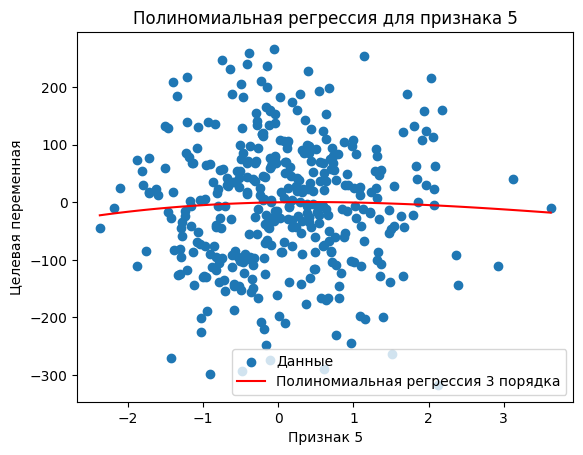

Коэффициент детерминации (R^2) для признака 5 и полиномиальной регрессии 3 порядка: 0.0010646025332345932


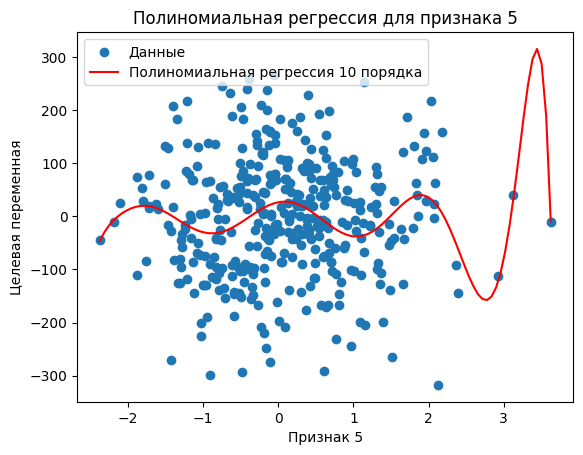

Коэффициент детерминации (R^2) для признака 5 и полиномиальной регрессии 10 порядка: 0.0450526417134679


In [10]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures


degrees = [2, 3, 10]
for i in range(x.shape[1]):
    for degree in degrees:
        model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
        model.fit(x[[i]], y)

        plt.scatter(x[i], y, color='#1f77b4', label='Данные')
        xx = np.linspace(x[i].min(), x[i].max(), 100).reshape((-1, 1))
        plt.plot(xx, model.predict(xx), color='red', label=f'Полиномиальная регрессия {degree} порядка')
        plt.title(f'Полиномиальная регрессия для признака {i+1}')
        plt.xlabel(f'Признак {i+1}')
        plt.ylabel('Целевая переменная')
        plt.legend()
        plt.show()

        r2 = model.score(x[[i]], y)
        print(f"Коэффициент детерминации (R^2) для признака {i+1} и полиномиальной регрессии {degree} порядка: {r2}")

#### 4. Постройте сводную таблицу показателей точности всех построенных моделей. Сделайте вывод, какие модели переобученнные, какие - недообученные.

In [18]:
results = []

# парные регрессии
for i in range(x.shape[1]):
    model = LinearRegression()
    model.fit(x[[i]], y)
    r2 = model.score(x[[i]], y)
    results.append(('Парная регрессия', f'Признак {i+1}', r2))

# множественная регрессия
multiple_model = LinearRegression()
multiple_model.fit(x, y)
r2 = multiple_model.score(x, y)
results.append(('Множественная регрессия', 'Все признаки', r2))

degrees = [2, 3, 10]
for i in range(x.shape[1]):
    for degree in degrees:
        model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
        model.fit(x[[i]], y)
        r2 = model.score(x[[i]], y)
        results.append((f'Полиномиальная регрессия {degree} порядка', f'Признак {i+1}', r2))
table = pd.DataFrame(results, columns=['Тип модели', 'Признак', 'R^2 (Коэффициент детерминации)'])
table


,Тип модели,Признак,R^2 (Коэффициент детерминации)
0,Парная регрессия,Признак 1,0.043643
1,Парная регрессия,Признак 2,0.769974
2,Парная регрессия,Признак 3,0.187945
3,Парная регрессия,Признак 4,0.047470
4,Парная регрессия,Признак 5,0.000172
5,Множественная регрессия,Все признаки,0.992220
6,Полиномиальная регрессия 2 порядка,Признак 1,0.043672
7,Полиномиальная регрессия 3 порядка,Признак 1,0.043765
8,Полиномиальная регрессия 10 порядка,Признак 1,0.050356
9,Полиномиальная регрессия 2 порядка,Признак 2,0.769994


#### 4. Используйте другие метрики качества регрессионной модели в дополнение к коэффициенту детерминации.

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score

y_pred = multiple_model.predict(x)
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
cross_val_score_ = cross_val_score(multiple_model, x, y)
print(f"Средняя абсолютная ошибка (MAE): {mae}")
print(f"Среднеквадратичная ошибка (MSE): {mse}")
print(f"Кросс-валидация:", cross_val_score_)

Средняя абсолютная ошибка (MAE): 7.780683675008628
Среднеквадратичная ошибка (MSE): 93.49228960042413
Кросс-валидация: [0.99126329 0.99387213 0.99022545 0.99144333 0.99110239]
